<a href="https://colab.research.google.com/github/mtello5/IS170_Machine_Learning/blob/Principal-Component-Analysis/HW6-Principle-Component-Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

HW6 Principle Component Analysis - Matthew Tello


In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
#Load data
data = pd.read_csv('/content/autos.csv')

In [ ]:
data.shape

(193, 25)

In [ ]:
#Check data from table
data.head()

,symboling,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9,111,5000,21,27,13495
1,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9,111,5000,21,27,16500
2,1,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9,154,5000,19,26,16500
3,2,audi,gas,std,4,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10,102,5500,24,30,13950
4,2,audi,gas,std,4,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8,115,5500,18,22,17450


In [ ]:
features = ["highway_mpg", "engine_size", "horsepower", "curb_weight"]

X = data.copy()
y = X.pop('price')
X = X.loc[:, features]

# Standardize
X_scaled = (X - X.mean(axis=0)) / X.std(axis=0)

In [ ]:
from sklearn.decomposition import PCA

# Create principal components
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Convert to dataframe
component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)

X_pca.head()

,PC1,PC2,PC3,PC4
0,0.382486,-0.400222,0.124122,0.169539
1,0.382486,-0.400222,0.124122,0.169539
2,1.550890,-0.107175,0.598361,-0.256081
3,-0.408859,-0.425947,0.243335,0.013920
4,1.132749,-0.814565,-0.202885,0.224138


In [ ]:
print('Explained variation per principal component: {}'.format(pca_breast.explained_variance_ratio_))

In [ ]:
print(pca.explained_variance_ratio_)

[0.85411424 0.06648926 0.05949457 0.01990192]


With an explained variance ratio of 0.854, the first principal component (PC1) accounts for the vast majority of data variance.
This indicates that PC1 captures the most significant patterns or relationships between the four features and may represent a "summary" of the four features. 

In [ ]:
df_pca = pd.DataFrame(X_pca, columns=['PC{}'.format(i+1) for i in range(X_pca.shape[1])])

**Plotting Data for PCA of Cars**

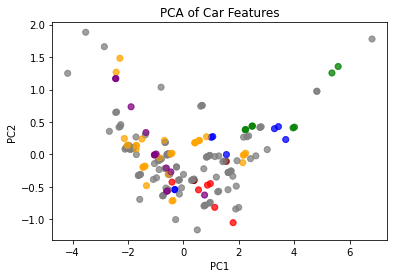

In [ ]:
import matplotlib.pyplot as plt

# Define a dictionary mapping 'make' values to colors
make_colors = {'audi': 'red', 'bmw': 'blue', 'mercedes-benz': 'green', 'toyota': 'orange', 'volkswagen': 'purple', 'alfa-romero': 'maroon'}

# Generate a list of colors based on the 'make' column of the df_pca dataframe
colors = [make_colors.get(make, 'gray') for make in data['make']]

# Create the scatter plot with colored points
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=colors, alpha=0.5)

# Create the scatter plot with colored points
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=colors, alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA of Car Features')
plt.show()

In this example, PC1 shows us a correlation between larger vehicles and poor gas mileage vs. smaller vehicles and good gas mileage. MPG being a the main compenent that can be used to determine other key details about a car like the other components used "engine size", "horsepower", "curb_weight". Additionally,

Coloring the 'make' we can better visualize the scatter plot points.
For instance, cars from different manufacturers tend to cluster together in different sections of the plot, showing systematic variances in car design. 